###############################################################
# PART3:     SIMULATIONS                               #
###############################################################

**Objective: Creation of a simulation**

Initial Simulation settings:
- Customers population:
     - 1000 returning customers pool
     - 1/3 of returning are hipsters
     - 10% of one-time are from tripadvisor
     - 20% probability of having a returning 
     
     
- Customers management:
     - Every customers have a unique ID
     - If a returning cannot buy the most expensive items combination it should not be draw
     
     
- Items prices:
    - Food:
         - sandwich    =   5          
         - cookie      =   2
         - pie         =   3          
         - muffin      =   3
    - Drinks
         - milkshake   =   5          
         - frappucino  =   4
         - soda        =   3
         - tea         =   3
         - coffee      =   3
         - water       =   2  

# INDEX

- Import:
    - Import packages
    - Import class module customer
- Read Data:
    - Read probabilities file
    - Read coffee-bar data set
- Simulation Settings:
    - Price table
    - Returning customers 
        - Profile probability tables
        - Number of drawable customers
        - Minimum budget for draw
    - Dates & Timestamps table
- Pool of customers functions:
    - Create a pool of customers
    - Draw a customer and return transaction data
- Simulation functions:
    - Launch a simulation
    - Run a simulation report
- Basic simulation:
    - Simulation
    - Comparison with the subject dataset
- Advanced simulations :
    - Pool of returning customers reduced to 50
    - Budget of hipsters drops to 40
    - Prices go up by 20% starting 2015
    - All non-one-time are hipsters that give a tip between 0 and 3
- Export Data

# IMPORTS

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd
import os  # Access to path
import sys # Access to module

# Import the class module Customer
sys.path.append(os.path.abspath("../Code/Class_Customer.py"))
from Class_Customer import Customer

# READ DATA #

In [2]:
# Reading the probabilies  csv file
datapath = os.path.abspath("../Data/Coffeebar_Probabilities.csv")
df_probabilities = pd.read_csv(datapath, sep=";")

# Reading customer data csv file
datapath = os.path.abspath("../Data/Coffeebar_2013-2017.csv")
df_customers = pd.read_csv(datapath, sep=";")
df_customers['TIME'] = pd.to_datetime(df_customers['TIME'])
   
#Quick Data recap :
print("The probabilities dataset contains {} rows and {} columns.".format(
    df_probabilities.shape[0],df_probabilities.shape[1]))
print("The customer dataset contains {} rows and {} columns.".format(
    df_customers.shape[0],df_customers.shape[1]))

The probabilities dataset contains 171 rows and 13 columns.
The customer dataset contains 312075 rows and 4 columns.


# SIMULATION SETTINGS

In [3]:
# Creation of a price table
prices = [
    ['frappucino', 'soda', 'coffee', 'tea', 'water', 'milkshake',
     'nothing', 'sandwich', 'pie', 'muffin', 'cookie'],
    [4, 3, 3, 3, 2, 5, 0, 5, 3, 3, 2]]
# Create a table of profile probabilities
ar_profile = [['onetime', 'tripadvisor', 'returning', 'hipster'],
              [0.8, 0.1, 2/3, 1/3]]

# Number of drawable customers :
pool_size = 1000

# Minimum budget to be picked
budget_min = pd.DataFrame(
    prices[1][:6]).max() + pd.DataFrame(prices[1][6:]).max()
budget_min = budget_min.values[0] # Convert to float

# Simulation days: 
simulation_dates = df_customers.groupby(df_customers[
  'TIME'].dt.strftime('%Y-%m-%d'))['TIME'].count()
simulation_dates = simulation_dates.index

# POOL OF CUSTOMERS FUNCTIONS

In [4]:
# Create customer population
def create_pool(size, profile):
    # Initialize the list of customers
    pool = []
    for k in range(0, size):
        
        # Draw a profile
        if random.uniform(0, 1) < profile[1][2]: # Returning
            # Create a unique ID
            x = Customer("Albert_the_%s%s" % (profile[0][2],k+1))
            # Change profile
            x.set_profile(profile[0][2])
        else: # Hipster
            # Create a unique ID
            x = Customer("Albert_the_%s%s" % (profile[0][3],k+1))
            # Change profile
            x.set_profile(profile[0][3])

        # Add customer to the list
        pool.append(x)
        
    # Return the created list of customers
    return pool

# Draw a customer from the pool and return the transaction results
def draw_pool(pool, temp_date, row,s_price, save_pool):
    
    # Draw a customer
    rand = random.randint(0, len(pool)-1)
    # Make transaction
    pool[rand].coffee_bar(row, temp_date, s_price) 
    
    # Set food / drinks / bill / profile
    position = len(pool[rand].buying_history[0])-1
    temp_drink = pool[rand].buying_history[1][position]
    temp_food = pool[rand].buying_history[2][position]
    temp_bill = pool[rand].buying_history[3][position]
    temp_profile = pool[rand].profile
    temp_id = pool[rand].customerID
    
    # Check if customer can be drawn again
    if pool[rand].budget < budget_min:
        save_pool.append(pool[rand])
        del pool[rand]
        
    # Return transaction data 
    return (temp_id, temp_drink, temp_food, temp_bill, temp_profile)

# SIMULATION FUNCTIONS

In [5]:
# Run a simulation
def launch_simulation(s_pool, s_dates, s_probas, s_profile, s_price):
    # Set a timer for the simulation process
    timer = datetime.now()
    # Temporary list of customers
    save_pool = []
    # Create simulation data tables
    sim_date = []
    sim_name = []
    sim_drink = []
    sim_food = []
    sim_bill = []
    sim_profile = []
    for date in s_dates:
        
        # Management of a simulation day
        for row in s_probas.itertuples(name=None, index=False):
            
            # Set the date
            temp_date = "%s %s" % (date, row[0])
            sim_date.append(temp_date)   
            
            # In case of one time or if pool of returning customer consumed
            rand =  random.uniform(0, 1)
            if rand < s_profile[1][0] or len(s_pool)==0: 
                
                # Set customer
                temp_name = '%s%s' % ("Gerard", temp_date)
                sim_name.append(temp_name)
                client = Customer(temp_name)
                # Change profile
                if random.uniform(0, 1) <= s_profile[1][1]:
                    client.set_profile('tripadvisor')
                    
                # Make transaction
                client.coffee_bar(row,temp_date,s_price)
                # Set food / drinks / bill / profile
                sim_drink.append(client.buying_history[1][0])
                sim_food.append(client.buying_history[2][0])
                sim_bill.append(client.buying_history[3][0])
                sim_profile.append(client.profile)
                
            else:
                
                # Call the function for transaction with returning customer
                temp_conso = draw_pool(
                    s_pool, temp_date, row, s_price, save_pool)

                # Set food / drinks / bill / profile
                sim_name.append(temp_conso[0])
                sim_drink.append(temp_conso[1])
                sim_food.append(temp_conso[2])
                sim_bill.append(temp_conso[3])
                sim_profile.append(temp_conso[4])
                
    # Reload a complete pool of returning customers
    for element in save_pool:
        s_pool.append(element)
        
    # Create a Coffeebar data frame
    simulation = pd.DataFrame({
        'TIME': sim_date, 'CUSTOMER': sim_name,
        'DRINKS': sim_drink, 'FOOD': sim_food,
        'BILL': sim_bill, 'PROFILE': sim_profile}) 
    
    # Print timer result      
    print('Process finished in %s\n' % (datetime.now()-timer))
    return simulation

# Analyse simulation dataset
def analyse_simulation(df_analysis, pool):
    df_analysis['TIME'] = pd.to_datetime(df_analysis['TIME'])

    # ABOUT CASH FLOWS 
    
    # By day 
    df_income = df_analysis.groupby(df_analysis[
        'TIME'].dt.strftime("%Y/%m/%d"))['BILL'].sum()
    print("Average daily Cash-Flow: %s" 
          % float("{0:.2f}".format(df_income.mean())))

    # By months 
    df_income = df_analysis.groupby(df_analysis[
        'TIME'].dt.strftime("%Y/%m"))['BILL'].sum()
    print("Average monthly Cash-Flow: %s" 
          % float("{0:.2f}".format(df_income.mean())))

    # Average for each hours
    df_income = df_analysis.groupby(df_analysis[
        'TIME'].dt.strftime("%H"))['BILL'].sum()/1825
    #print("Average Cash-Flow for each hour:\n%s" % df_income)
    # Plot drinks over time
    plt.figure(figsize=(10,5))
    plt.bar(df_income.index, df_income)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Cash-Flow')
    plt.title('Average Cash-Flow')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.abspath('../Plots/Simulation/Average_CF_Hourly.png' ))
    plt.show()

    # Average transaction value for each hours
    df_income= df_analysis.groupby(
        df_analysis['TIME'].dt.strftime("%H"))[
        'BILL'].sum()/df_analysis.groupby(df_analysis[
        'TIME'].dt.strftime("%H"))['CUSTOMER'].count()
    # Plot drinks over time
    plt.figure(figsize=(10, 5))
    plt.bar(df_income.index, df_income)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Price')
    plt.title('Average Transaction Price')
    plt.grid(True)
    plt.tight_layout()
    path = '../Plots/Simulation/Average_Transaction_Hourly.png'
    plt.savefig(os.path.abspath( path ))
    plt.show()

    # By profile 
    # Absolute
    df_income = df_analysis.groupby(df_analysis['PROFILE'])['BILL'].sum()
    # Plot drinks over time
    plt.figure(figsize=(10, 5))
    plt.bar(df_income.index, df_income)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Price')
    plt.title('Average Transaction Price')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.abspath('../Plots/Simulation/Average_CF_Profile.png' ))
    plt.show()
    # Relative
    df_income = df_analysis.groupby(df_analysis[
        'PROFILE'])['BILL'].sum()/sum(df_analysis.groupby(df_analysis[
        'PROFILE'])['BILL'].sum())
    print("Relative income source :\n%s\n" % df_income)

    # ABOUT RETURNING

    # Sub Data Frame with only returning customers 
    df_a_returning = df_analysis[
        df_analysis.duplicated(['CUSTOMER'], keep=False)]

    # Number of returning & one-time  customers
    print("Number of returning customers: %s" 
          % len(df_a_returning['CUSTOMER'].unique()))
    print("Number of one-time customers: %s" 
          % (len(df_analysis['CUSTOMER'].unique())-len(
              df_a_returning['CUSTOMER'].unique())))

    # Number of occurence of a returning customer
    print("Number of occurence of a returning customer: %s" 
          % len(df_a_returning['CUSTOMER']))
    print('Average number of occurences:%s' 
          % float("{0:.2f}".format(df_a_returning.groupby(df_a_returning[
        'CUSTOMER'])['TIME'].count().mean())))  
    
    # In case a pool is given as argument
    if not pool == None:
        # Number of returning customers with sufficient budget 
        # Average remaining budget
        remaining = 0
        average_budget = 0
        for i in pool:
            average_budget += i.budget/len(pool)
            if not i.budget < budget_min:
                remaining += 1
        print("Number of returning customers with sufficient budget at the end of simulation: %s"
              % remaining)
        print("Average remaining budget: %s"
              % average_budget)
    
    return

# BASIC  SIMULATION
**This is the simulation using the informations given in the third part of the project.**

Process finished in 0:00:05.511825

Average daily Cash-Flow: 952.16
Average monthly Cash-Flow: 28961.43


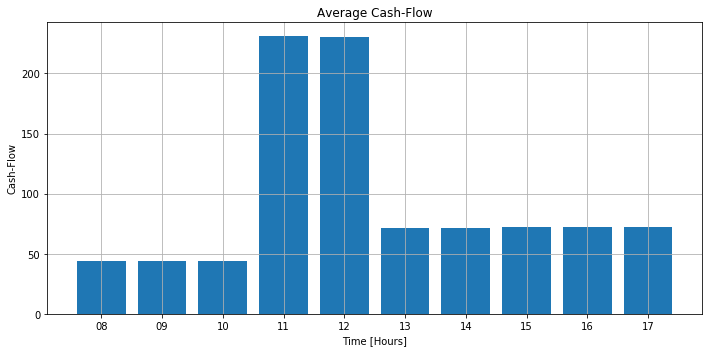

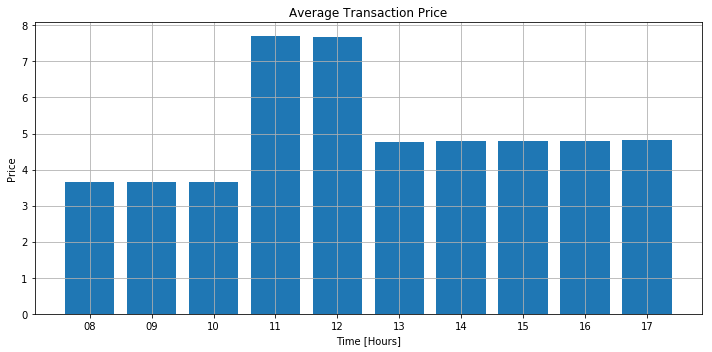

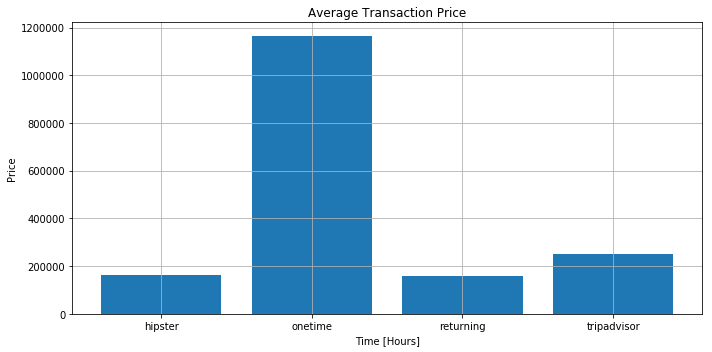

Relative income source :
PROFILE
hipster        0.094630
onetime        0.669496
returning      0.091231
tripadvisor    0.144643
Name: BILL, dtype: float64

Number of returning customers: 1000
Number of one-time customers: 249537
Number of occurence of a returning customer: 62538
Average number of occurences:62.54
Number of returning customers with sufficient budget at the end of simulation: 166
Average remaining budget: 14.281999999999963


In [6]:
# Create a pool of customer
simulation_pool = create_pool(pool_size, ar_profile)    

# Create a simulation
df_simulation = launch_simulation(
    simulation_pool, simulation_dates, df_probabilities, ar_profile,prices)

# Analyse data
analyse_simulation(df_simulation, simulation_pool)

Since our probabilities table was constructed with the Coffebar_2013_2017.csv the simulation results must are close from the one produced in the previous simulation. The main difference is on the coffee consumption of returning customers, which is not the same as the coffee consumption of the one-timer (See part1).  

In [7]:
# Differences in food consumption rates  
temp1 = df_simulation.groupby(df_simulation['TIME'].dt.strftime("%H"))[
    'FOOD'].value_counts()/df_simulation.groupby(df_simulation[
    'TIME'].dt.strftime("%H"))['DRINKS'].count()
temp2 = df_customers.groupby(df_customers['TIME'].dt.strftime("%H"))[
    'FOOD'].value_counts()/df_customers.groupby(df_customers[
    'TIME'].dt.strftime("%H"))['DRINKS'].count()
df_compare = temp1 - temp2
print("Differences in food consumption rates :\n%s"  % df_compare)

# Differences in drinks consumption rate  
temp1 = df_simulation.groupby(df_simulation['TIME'].dt.strftime("%H"))[
    'DRINKS'].value_counts()/df_simulation.groupby(df_simulation[
    'TIME'].dt.strftime("%H"))['DRINKS'].count()
temp2 = df_customers.groupby(df_customers['TIME'].dt.strftime("%H"))[
    'DRINKS'].value_counts()/df_customers.groupby(df_customers[
    'TIME'].dt.strftime("%H"))['DRINKS'].count()
df_compare = temp1 - temp2
print("Differences in drinks consumption rates  :\n%s"  % df_compare)

# Sub Data Frame with only returning customers 
df_returning_sim = df_simulation[
    df_simulation.duplicated(['CUSTOMER'], keep=False)]
df_returning = df_customers[
    df_customers.duplicated(['CUSTOMER'], keep=False)]
temp1 = df_returning_sim[df_returning_sim['DRINKS']=="coffee"]
temp2 = df_returning[df_returning['DRINKS']=="coffee"]

# Total drinks sold over time
df_coffee_compare = (temp1.groupby(temp1['TIME'].dt.strftime("%H"))[
    'DRINKS'].count()/df_returning_sim.groupby(df_returning_sim[
    'TIME'].dt.strftime("%H"))['DRINKS'].count())-(temp2.groupby(temp2[
    'TIME'].dt.strftime("%H"))['DRINKS'].count()/df_returning.groupby(
    df_returning['TIME'].dt.strftime("%H"))['DRINKS'].count())
print("Differences in coffee consumption rates for returning customers:\n%s"  
      % df_coffee_compare)

Differences in food consumption rates :
TIME  FOOD    
08    nothing          NaN
09    nothing          NaN
10    nothing          NaN
11    cookie     -0.000493
      muffin     -0.000877
      pie        -0.001224
      sandwich    0.002594
12    cookie      0.000548
      muffin      0.002174
      pie         0.002009
      sandwich   -0.004731
13    cookie     -0.001023
      muffin     -0.002009
      nothing          NaN
      pie        -0.003068
14    cookie      0.001461
      muffin     -0.002301
      nothing          NaN
      pie        -0.000548
15    cookie      0.001680
      muffin     -0.000840
      nothing          NaN
      pie        -0.002740
16    cookie     -0.001205
      muffin     -0.002959
      nothing          NaN
      pie         0.002849
17    cookie     -0.000913
      muffin     -0.002959
      nothing          NaN
      pie        -0.000037
dtype: float64
Differences in drinks consumption rates  :
TIME  DRINKS    
08    coffee       -0.004977
    

# ADVANCED  SIMULATIONS
- **1:** Pool of returning customers reduced to 50
- **2:** Budget of hipsters drops to 40
- **3:** Price go up by 20% starting 2015
- **4:** All non-one-time are hipsters that give a tip between 0 and 3

Process finished in 0:00:05.586901

Average daily Cash-Flow: 969.55
Average monthly Cash-Flow: 29490.42


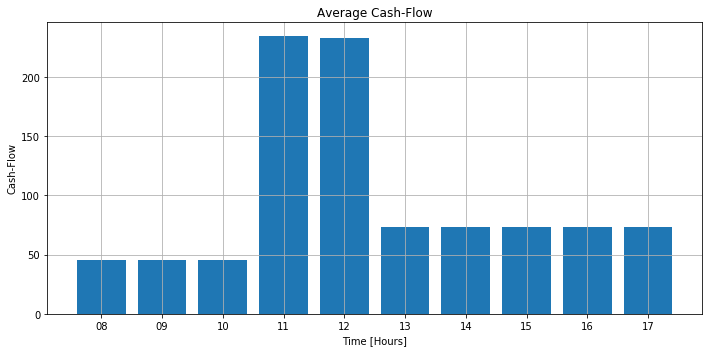

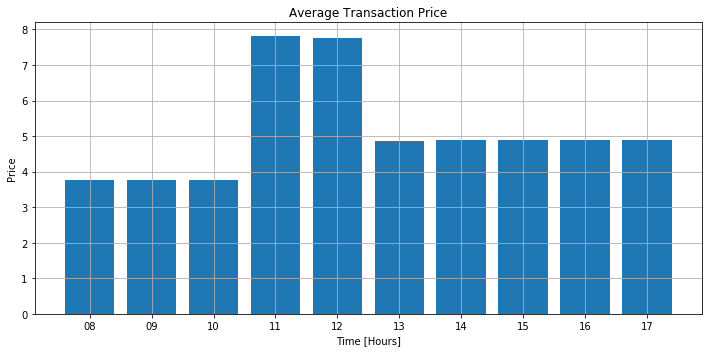

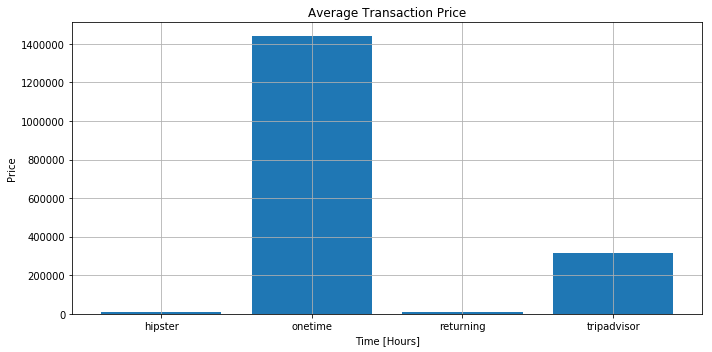

Relative income source :
PROFILE
hipster        0.004184
onetime        0.813272
returning      0.004823
tripadvisor    0.177721
Name: BILL, dtype: float64

Number of returning customers: 50
Number of one-time customers: 308951
Number of occurence of a returning customer: 3124
Average number of occurences:62.48
Number of returning customers with sufficient budget at the end of simulation: 0
Average remaining budget: 6.24


In [8]:
#####
# 1 #
#####

#NEW SETTINGS 
adv_pool_size = 50

#RUN SIMULATION
# Create a pool of customer
simulation_pool1 = create_pool(adv_pool_size, ar_profile)    
# Create a simulation
df_simulation_adv1 = launch_simulation(
    simulation_pool1, simulation_dates, df_probabilities, ar_profile, prices)

# Analyse data
analyse_simulation(df_simulation_adv1, simulation_pool1)

Process finished in 0:00:05.677896

Average daily Cash-Flow: 961.23
Average monthly Cash-Flow: 29237.55


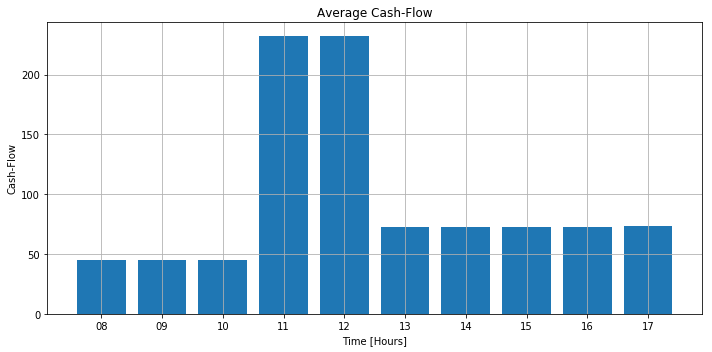

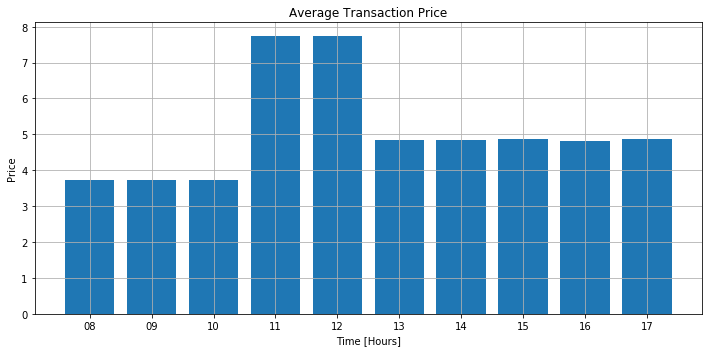

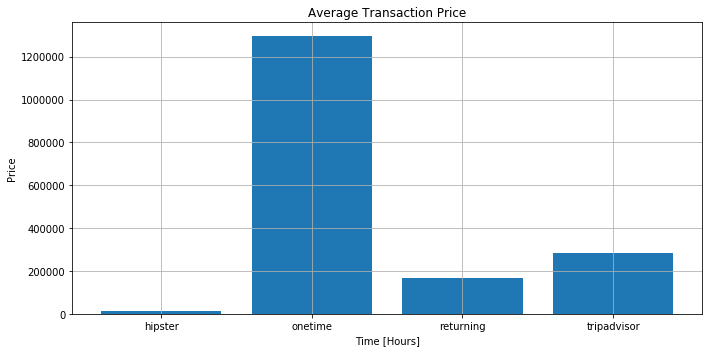

Relative income source :
PROFILE
hipster        0.006197
onetime        0.738301
returning      0.093952
tripadvisor    0.161551
Name: BILL, dtype: float64

Number of returning customers: 1000
Number of one-time customers: 278097
Number of occurence of a returning customer: 33978
Average number of occurences:33.98
Number of returning customers with sufficient budget at the end of simulation: 0
Average remaining budget: 6.4839999999999804


In [9]:
#####
# 2 #
#####

#NEW SETTINGS 
newset = Customer('ObiwanKenobi')
newset.settings[1][3] = 40

#RUN SIMULATION
# Create a pool of customer
simulation_pool2 = create_pool(pool_size, ar_profile)    
# Create a simulation
df_simulation_adv2 = launch_simulation(
    simulation_pool2, simulation_dates, df_probabilities, ar_profile,prices)

# Analyse data
analyse_simulation(df_simulation_adv2, simulation_pool2)

#SWITCH BACK SETTINGS 
newset.settings[1][3] = 500

Process finished in 0:00:02.116813

Process finished in 0:00:03.169446

Average daily Cash-Flow: 1061.17
Average monthly Cash-Flow: 32259.57


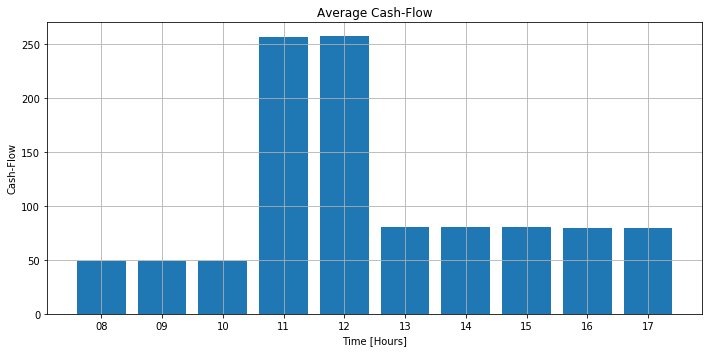

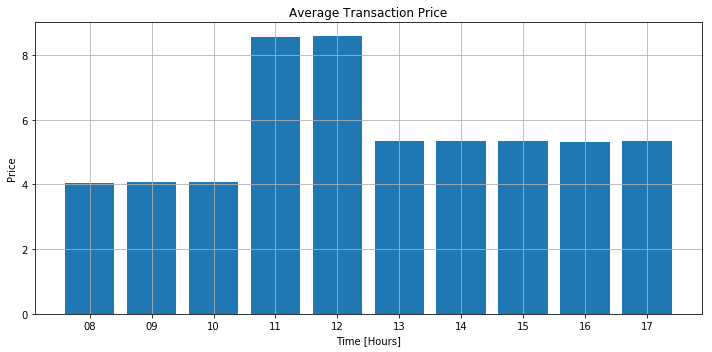

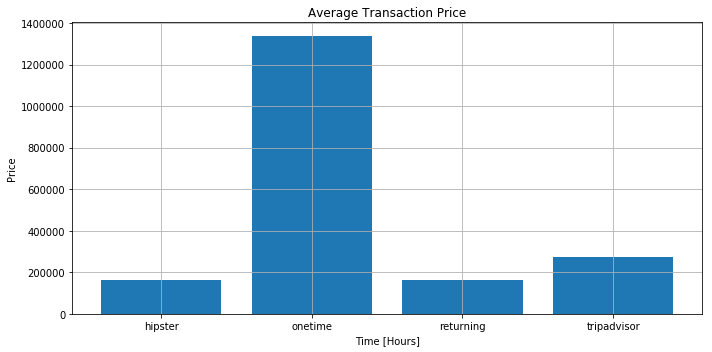

Relative income source :
PROFILE
hipster        0.083027
onetime        0.690519
returning      0.084007
tripadvisor    0.142446
Name: BILL, dtype: float64

Number of returning customers: 1000
Number of one-time customers: 255546
Number of occurence of a returning customer: 56358
Average number of occurences:56.36
Number of returning customers with sufficient budget at the end of simulation: 0
Average remaining budget: 8.442399999999978


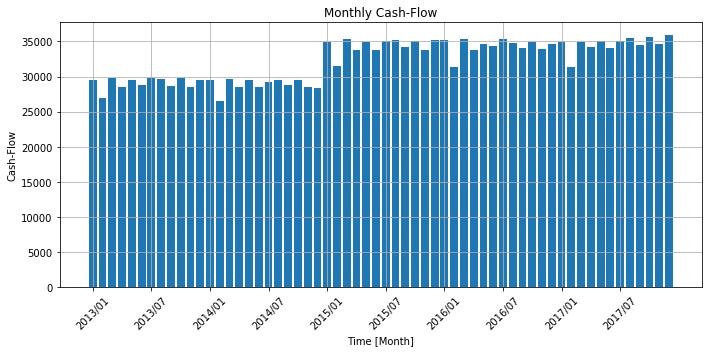

In [10]:
#####
# 3 # For this one the trick is to run 2 separate simulations on a subset of dates with different settings...
#####

# NEW SETTINGS 

for i in range(len(simulation_dates)-1):
    if '2015' in simulation_dates[i]:
        simulation_dates1 = simulation_dates[:i-1]
        simulation_dates2 = simulation_dates[i:] 
        break
# Create an alternate price table
prices2 = [[], []]
for i in range(len(prices[0])):
    prices2[0].append(prices[0][i])
    prices2[1].append(float("{0:.2f}".format(prices[1][i]*1.2)))
    
# RUN SIMULATIONS
# Create a pool of customer
simulation_pool3 = create_pool(pool_size,ar_profile)    

# Create a simulations
# Part 1
df_simulation_adv3p1 = launch_simulation(
    simulation_pool3, simulation_dates1, df_probabilities, ar_profile,prices)

# Part 2
# Refresh minimum budget to be picked
budget_min= pd.DataFrame(
    prices2[1][:6]).max() + pd.DataFrame(prices2[1][6:]).max()
budget_min= budget_min.values[0] # Convert to float
# Check if some returning customers a not drawable from the start & store them
temp_adv_pool = []
for i in simulation_pool3:
    if i.budget < budget_min:
        temp_adv_pool.append(i)
        del i
# Run simulation
df_simulation_adv3p2 = launch_simulation(
    simulation_pool3, simulation_dates2, df_probabilities, ar_profile,prices2)
# Put back stored customers 
if temp_adv_pool != []:
    simulation_pool3.append(temp_adv_pool)

# Merge data
df_simulation_adv3 = pd.concat([df_simulation_adv3p1, df_simulation_adv3p2])

# Analyse data
analyse_simulation(df_simulation_adv3, simulation_pool3)

# Graph to visualize changes in monthly cash flow
df_simulation_adv3['TIME'] = pd.to_datetime(df_simulation_adv3['TIME'])
df_income = df_simulation_adv3.groupby(
    df_simulation_adv3['TIME'].dt.strftime("%Y/%m"))['BILL'].sum()
# Create a custom xlabel
custom_axe = [(a, b) for a, b in enumerate(df_income.index) if a % 6 == 0]
pos = [a[0] for a in custom_axe]
lab = [a[1] for a in custom_axe]
# Plot drinks over time
plt.figure(figsize=(10, 5))
plt.bar(df_income.index, df_income)
plt.xlabel('Time [Month]')
plt.ylabel('Cash-Flow')
plt.xticks(pos, lab, rotation=45)
plt.title('Monthly Cash-Flow')
plt.grid(True)
plt.tight_layout()
path = '../Plots/Simulation/ADVsim_CashFlow_Monthly.png'
plt.savefig(os.path.abspath( path ))

#SWITCH BACK SETTINGS 
budget_min= pd.DataFrame(
    prices[1][:6]).max() + pd.DataFrame(prices[1][6:]).max()
budget_min= budget_min.values[0] # Convert to float

Process finished in 0:00:05.450529

Average daily Cash-Flow: 1004.19
Average monthly Cash-Flow: 30544.17


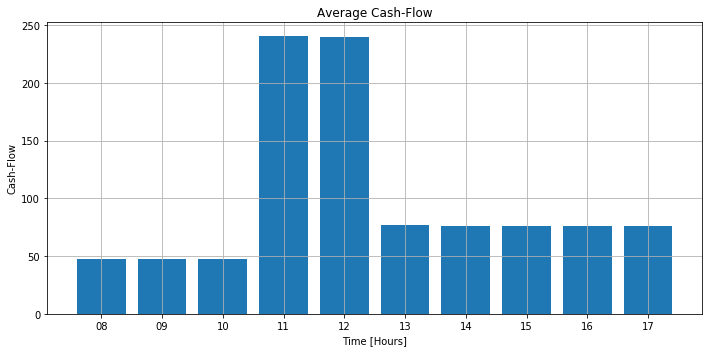

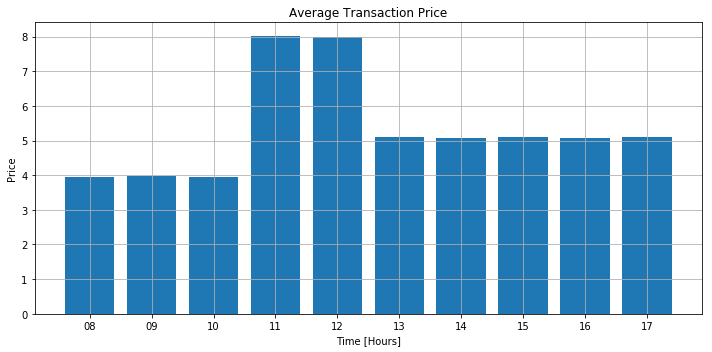

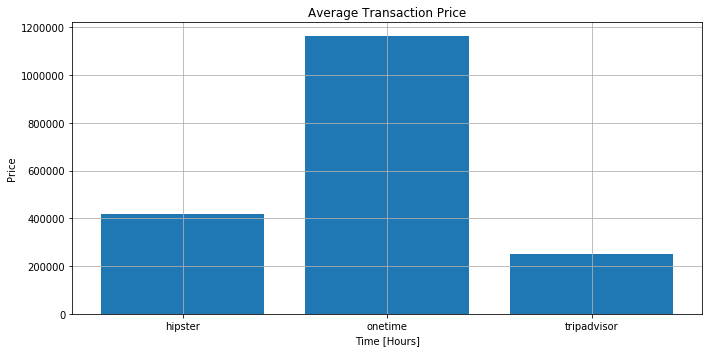

Relative income source :
PROFILE
hipster        0.228012
onetime        0.634653
tripadvisor    0.137335
Name: BILL, dtype: float64

Number of returning customers: 1000
Number of one-time customers: 249498
Number of occurence of a returning customer: 62577
Average number of occurences:62.58
Number of returning customers with sufficient budget at the end of simulation: 897
Average remaining budget: 82.1334399999999


In [11]:
#####
# 4 # Only hipster returning with small tips(between 0 and 3)
#####

#NEW SETTINGS 
newset = Customer('ObiwanKenobi')
# Change tip
newset.settings[2][3] = 3
# Change returning customer profiles
ar_profile[1][2] = 0
ar_profile[1][3] = 1

#RUN SIMULATION
# Create a pool of customer
simulation_pool4 = create_pool(pool_size, ar_profile)    
# Create a simulation
df_simulation_adv4=launch_simulation(
    simulation_pool4, simulation_dates, df_probabilities, ar_profile,prices)

# Analyse data
analyse_simulation(df_simulation_adv4, simulation_pool4)

#SWITCH BACK SETTINGS 
# Change tip
newset.settings[2][3] = 0
# Change returning customer profiles
ar_profile[1][2] = 2/3
ar_profile[1][3] = 1/3


# EXPORT

In [12]:
# Saving simulation data into csv file
datapath = os.path.abspath("../Data/Coffeebar_Simulation.csv")
df_simulation.to_csv(datapath, sep=';')